In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df=pd.read_csv("/content/Finance_data.csv")

In [5]:
df.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [6]:
df.shape

(40, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   gender                             40 non-null     object
 1   age                                40 non-null     int64 
 2   Investment_Avenues                 40 non-null     object
 3   Mutual_Funds                       40 non-null     int64 
 4   Equity_Market                      40 non-null     int64 
 5   Debentures                         40 non-null     int64 
 6   Government_Bonds                   40 non-null     int64 
 7   Fixed_Deposits                     40 non-null     int64 
 8   PPF                                40 non-null     int64 
 9   Gold                               40 non-null     int64 
 10  Stock_Marktet                      40 non-null     object
 11  Factor                             40 non-null     object
 12  Objective 

In [8]:
df.describe()

,age,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,27.800000,2.550000,3.475000,5.750000,4.650000,3.575000,2.025000,5.975000
std,3.560467,1.197219,1.131994,1.675617,1.369072,1.795828,1.609069,1.143263
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,25.750000,2.000000,3.000000,5.000000,4.000000,2.750000,1.000000,6.000000
50%,27.000000,2.000000,4.000000,6.500000,5.000000,3.500000,1.000000,6.000000
75%,30.000000,3.000000,4.000000,7.000000,5.000000,5.000000,2.250000,7.000000
max,35.000000,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000


In [9]:
df.isnull().sum()/len(df)*100

,0
gender,0.0
age,0.0
Investment_Avenues,0.0
Mutual_Funds,0.0
Equity_Market,0.0
Debentures,0.0
Government_Bonds,0.0
Fixed_Deposits,0.0
PPF,0.0
Gold,0.0


<Axes: >

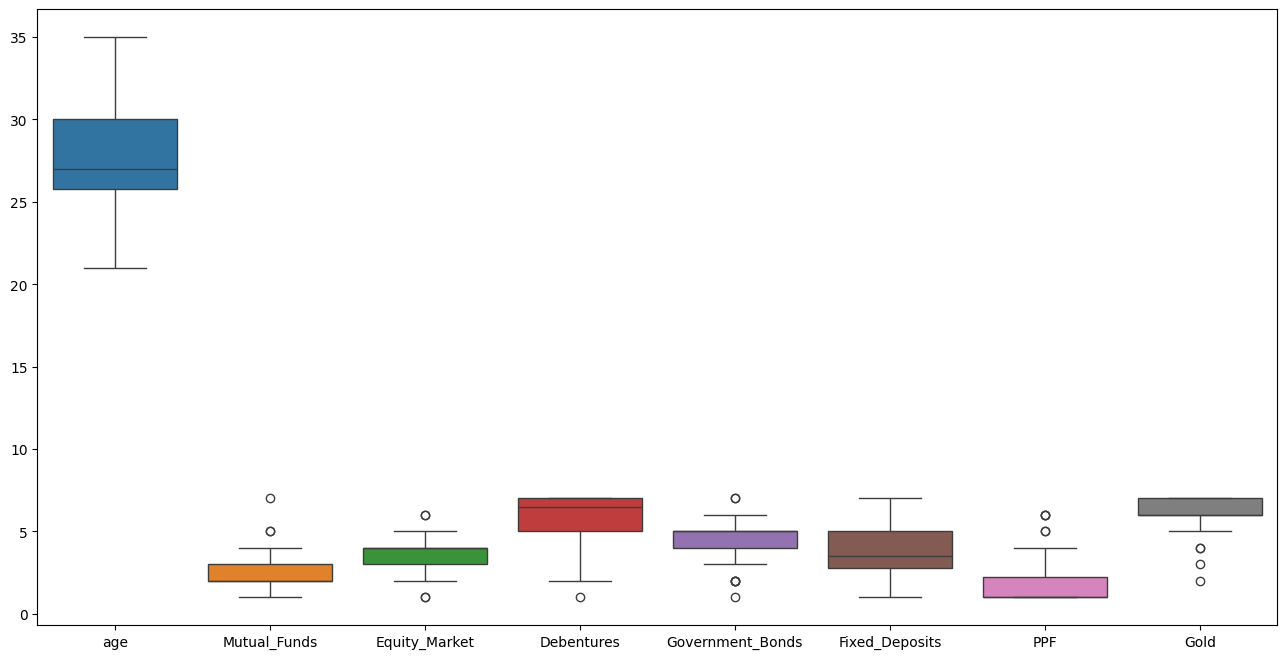

In [10]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df)

In [11]:
df1=df.copy()
df1

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet
5,Female,24,No,7,5,4,6,3,1,2,...,1-3 years,Daily,30%-40%,Mutual Fund,Retirement Plan,Liquidity,Fund Diversification,Safe Investment,Risk Free,Internet
6,Female,27,Yes,3,6,4,2,5,1,7,...,3-5 years,Monthly,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,High Interest Rates,Financial Consultants
7,Male,21,Yes,2,3,7,4,6,1,5,...,3-5 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Newspapers and Magazines
8,Male,35,Yes,2,4,7,5,3,1,6,...,1-3 years,Weekly,20%-30%,Equity,Retirement Plan,Capital Appreciation,Fund Diversification,Safe Investment,Fixed Returns,Television
9,Male,31,Yes,1,3,7,4,5,2,6,...,3-5 years,Monthly,30%-40%,Fixed Deposits,Retirement Plan,Capital Appreciation,Fund Diversification,Assured Returns,Fixed Returns,Newspapers and Magazines


In [14]:
for i in df1.columns:
    if pd.api.types.is_numeric_dtype(df1[i]):
        q1=df1[i].quantile(0.25)
        q3=df1[i].quantile(0.75)
        iqr=q3-q1
        upper_limit=q3+1.5*iqr
        lower_limit=q1-1.5*iqr
        df1[i]=np.where(df1[i]>upper_limit, upper_limit, np.where(df1[i]<lower_limit, lower_limit,df1[i]))

In [15]:
df1.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34.0,Yes,1.0,2.0,5.0,3.0,7.0,4.125,4.5,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23.0,Yes,4.0,3.0,2.0,2.5,5.0,4.125,7.0,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30.0,Yes,3.0,5.5,4.0,2.5,5.0,1.000,7.0,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22.0,Yes,2.0,1.5,3.0,6.5,6.0,4.000,5.0,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24.0,No,2.0,1.5,3.0,6.0,4.0,4.125,7.0,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


<Axes: >

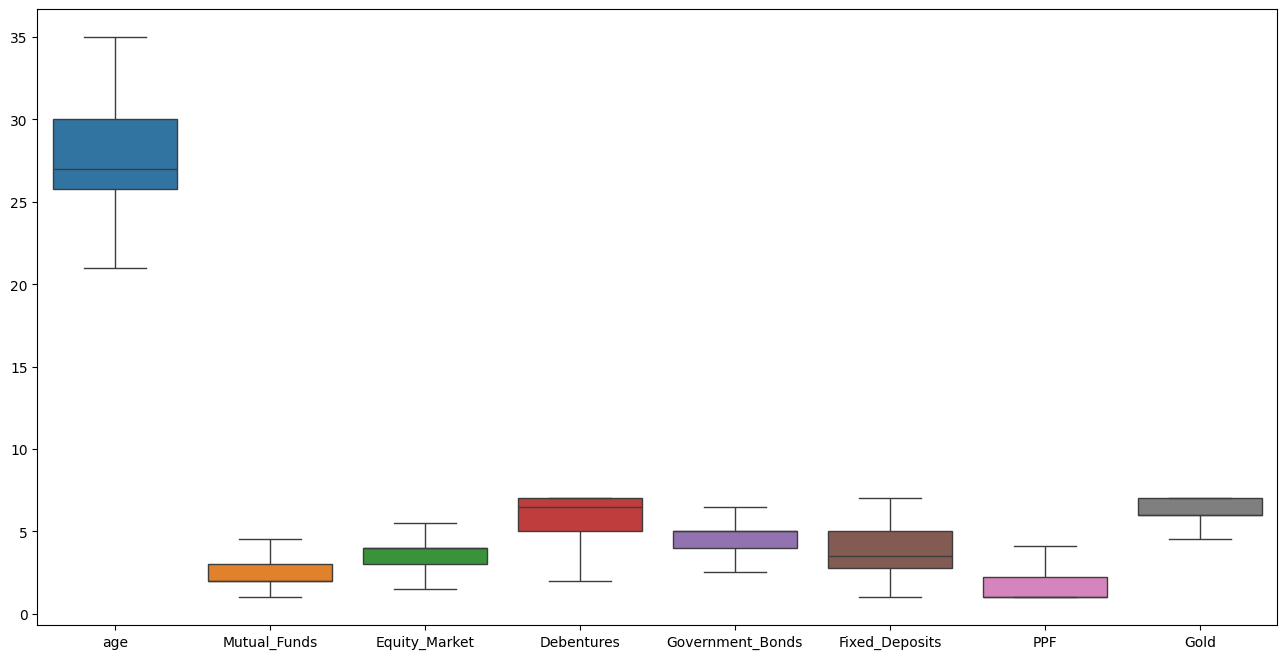

In [16]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df1)

segregate x and y

In [18]:
x=df1.drop(columns=['Expect'])
y=df['Expect']

scaling

In [20]:
x_encoded = pd.get_dummies(x, drop_first=True)
st = StandardScaler()
x_scaled = st.fit_transform(x_encoded)

split x and y into train and test

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=43)

In [23]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
y_pred=kn.predict(x_test)

In [51]:
y_pred_train=grid.predict(x_train)

In [27]:
accuracy_score(y_pred,y_test)*100

75.0

In [52]:
accuracy_score(y_pred_train,y_train)*100

87.5

Hyperparameter tunning for KNN

In [30]:
param_grid={
        'n_neighbors': list(range(1,70,2))
}

In [31]:
grid=GridSearchCV(kn,param_grid,verbose=3)

In [33]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.857 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.571 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.833 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.500 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.667 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.857 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3;, score=0.714 total time=   0.0s
[CV 3/5] END .....................n_neighbors=3;, score=0.833 total time=   0.0s
[CV 4/5] END .....................n_neighbors=3;, score=0.833 total time=   0.0s
[CV 5/5] END .....................n_neighbors=3;, score=0.833 total time=   0.0s
[CV 1/5] END .....................n_neighbors=5;, score=0.857 total time=   0.0s
[CV 2/5] END .....................n_neighbors=5

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV 5/5] END ....................n_neighbors=21;, score=0.833 total time=   0.0s
[CV 1/5] END ....................n_neighbors=23;, score=0.857 total time=   0.0s
[CV 2/5] END ....................n_neighbors=23;, score=0.714 total time=   0.0s
[CV 3/5] END ....................n_neighbors=23;, score=0.833 total time=   0.0s
[CV 4/5] END ....................n_neighbors=23;, score=0.833 total time=   0.0s
[CV 5/5] END ....................n_neighbors=23;, score=0.833 total time=   0.0s
[CV 1/5] END ....................n_neighbors=25;, score=0.857 total time=   0.0s
[CV 2/5] END ....................n_neighbors=25;, score=0.714 total time=   0.0s
[CV 3/5] END ....................n_neighbors=25;, score=0.833 total time=   0.0s
[CV 4/5] END ....................n_neighbors=25;, score=0.833 total time=   0.0s
[CV 5/5] END ....................n_neighbors=25;, score=0.833 total time=   0.0s
[CV 1/5] END ......................n_neighbors=27;, score=nan total time=   0.0s
[CV 2/5] END ...............

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 472, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py", line 446, in score
    return super().score(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 572, in score
    return accuracy_score(y, self.predict(X), sample_weig

[CV 3/5] END ......................n_neighbors=53;, score=nan total time=   0.0s
[CV 4/5] END ......................n_neighbors=53;, score=nan total time=   0.0s
[CV 5/5] END ......................n_neighbors=53;, score=nan total time=   0.0s
[CV 1/5] END ......................n_neighbors=55;, score=nan total time=   0.0s
[CV 2/5] END ......................n_neighbors=55;, score=nan total time=   0.0s
[CV 3/5] END ......................n_neighbors=55;, score=nan total time=   0.0s
[CV 4/5] END ......................n_neighbors=55;, score=nan total time=   0.0s
[CV 5/5] END ......................n_neighbors=55;, score=nan total time=   0.0s
[CV 1/5] END ......................n_neighbors=57;, score=nan total time=   0.0s
[CV 2/5] END ......................n_neighbors=57;, score=nan total time=   0.0s
[CV 3/5] END ......................n_neighbors=57;, score=nan total time=   0.0s
[CV 4/5] END ......................n_neighbors=57;, score=nan total time=   0.0s
[CV 5/5] END ...............

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 472, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py", line 446, in score
    return super().score(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 572, in score
    return accuracy_score(y, self.predict(X), sample_weig

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49, 51, 53, 55, 57, 59, ...]},
             verbose=3)

In [34]:
grid.best_params_

{'n_neighbors': 3}

In [38]:
print((grid.best_score_)*100)

81.42857142857143


In [43]:
grid=KNeighborsClassifier(n_neighbors=3)

In [44]:
grid.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
y_pred_train=grid.predict(x_train)

In [49]:
y_pred=grid.predict(x_test)

In [54]:
accuracy_score(y_pred,y_test)*100

75.0

In [55]:
accuracy_score(y_pred_train,y_train)*100

87.5